In [32]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Params: n_papers = 1000, lr = 5, sm_runs_trsh = 0.99

# Comparison of the Baseline algorithms
### Dong vs Dawid vs MV

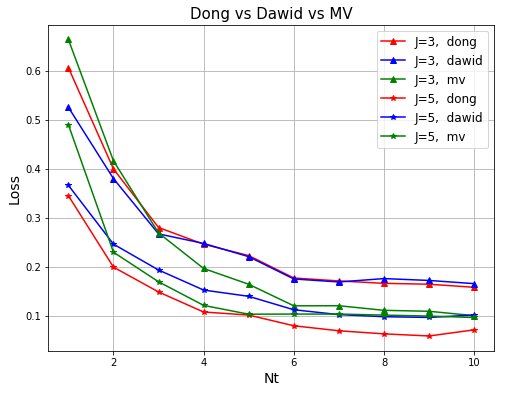

In [40]:
data = pd.read_csv('../output/data/dong_dawid_mv.csv')

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['red', 'blue', 'green'])
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
J_arr = [3, 5]
algs_arr = ['dong', 'dawid', 'mv']

def plot_alg(J, marker):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(3, '^')
plot_alg(5, '*')
    
plt.title('Dong vs Dawid vs MV', size=15)
plt.xlabel('Nt', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

# 1. SM-runs convergence

Chart shows the number of unclassified papers after i interactions

In [2]:
conv_data = pd.read_csv('../output/data/convergence_test.csv')

In [3]:
x_conv = range(1, 51)
y1 = conv_data.iloc[0].values[2:] #Nt=3 J=3
y2 = conv_data.iloc[1].values[2:] #Nt=3 J=5
y3 = conv_data.iloc[2].values[2:] #Nt=5 J=3
y4 = conv_data.iloc[3].values[2:] #Nt=5 J=5

/Library/Python/2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


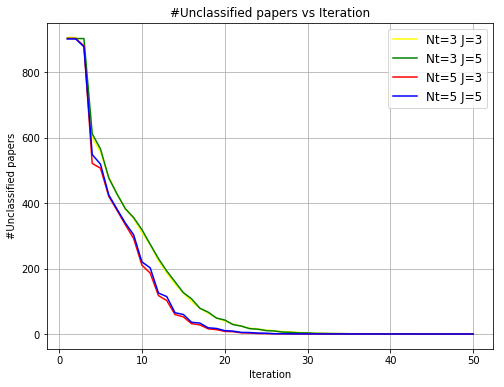

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['yellow', 'green', 'red', 'blue', 'red'])
plt.plot(x_conv, y1)
plt.plot(x_conv, y2)
plt.plot(x_conv, y3)
plt.plot(x_conv, y4)
plt.legend(['Nt=3 J=3', 'Nt=3 J=5', 'Nt=5 J=3', 'Nt=5 J=5'], loc='upper right', fontsize = 12)
plt.ylabel('#Unclassified papers')
plt.xlabel('Iteration')
plt.title('#Unclassified papers vs Iteration')
plt.grid()
plt.show()

# 2. SM-runs baseline round

The chart depicts Loss vs Price trade off for the proportion of papers p used in baseline iteration (p=0.1 means 10% from I). Each dot reflects the number of votes per criteria J. J = [1, ..., 10], lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

In [5]:
br = pd.read_csv('../output/data/baseline_round.csv')

In [6]:
br = br.loc[br['alg'] == 'SM-runs']

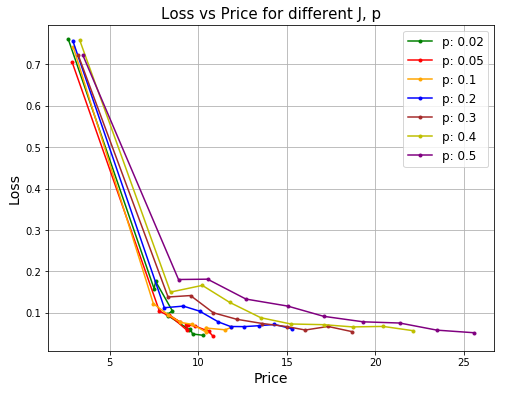

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['green', 'red', 'orange', 'blue', 'brown', 'y', 'purple'])
labels = br['fr_p'].unique()
for fr_p in labels:
    x = br.loc[br['fr_p'] == fr_p]['price_mean']
    y=br.loc[br['fr_p'] == fr_p]['loss_mean']
    plt.plot(x, y, label='p: {}'.format(fr_p), marker='.')
plt.title('Loss vs Price for different J, p', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

--> p = 0.05 (for n_papers = 1000) looks as the optimal choice.

# 3. Loss vs Nt

Loss vs Nt for baseline, M-runs, SM-runs. J = [3, 5], p = [0.1, 0.05], lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

In [8]:
data = pd.read_csv('../output/data/loss_tests_lr5_fr01.csv')
data2 = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')

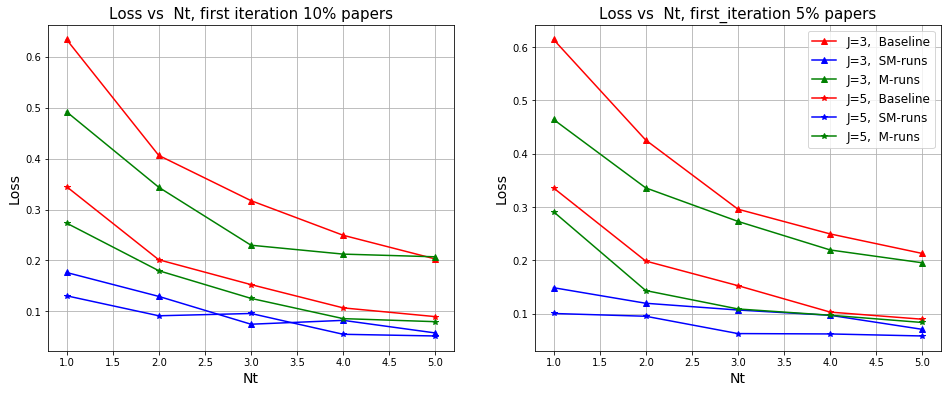

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(['red', 'blue', 'green'])
x = [1, 2, 3, 4, 5]
J_arr = [3, 5]
algs_arr = ['Baseline', 'SM-runs', 'M-runs']

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values[:5]
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(data, 3, '^', 0)
plot_alg(data, 5, '*', 0)   
ax[0].set_title('Loss vs  Nt, first iteration 10% papers', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('Loss', size=14)
# ax[0].legend(fontsize = 12)
ax[0].grid()


ax[1].set_color_cycle(['red', 'blue', 'green'])
x = [1, 2, 3, 4, 5]
J_arr = [3, 5]
algs_arr = ['Baseline', 'SM-runs', 'M-runs']
plot_alg(data2, 3, '^', 1)
plot_alg(data2, 5, '*', 1)   
ax[1].set_title('Loss vs  Nt, first_iteration 5% papers', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()



# 4. F_beta vs Nt

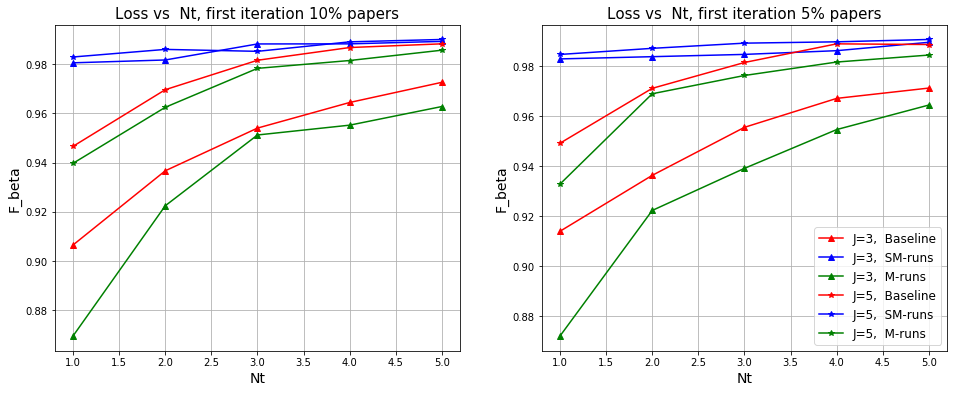

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[1].set_color_cycle(['red', 'blue', 'green'])
x = [1, 2, 3, 4, 5]
# x = range(1, 11)
J_arr = [3, 5]
algs_arr = ['Baseline', 'SM-runs', 'M-runs']

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['f_beta'].values[:5]
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(data2, 3, '^', 1)
plot_alg(data2, 5, '*', 1)   
ax[1].set_title('Loss vs  Nt, first iteration 5% papers', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('F_beta', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()

ax[0].set_color_cycle(['red', 'blue', 'green'])
plot_alg(data, 3, '^', 0)
plot_alg(data, 5, '*', 0)   
ax[0].set_title('Loss vs  Nt, first iteration 10% papers', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('F_beta', size=14)
# ax[0].legend(fontsize = 12)
ax[0].grid()

# 4. Loss vs Price

J = [3, 5, 10], Nt = [1,..., 10], p = 0.1, lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

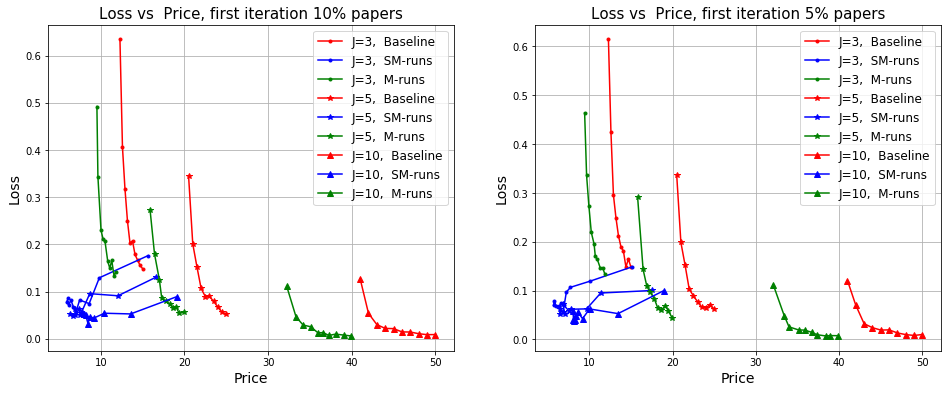

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(['red', 'blue', 'green'])
J = [3, 5, 10]
algs_arr = ['Baseline', 'SM-runs', 'M-runs']

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)
        
plot_alg(data, 3, '.', 0)
plot_alg(data, 5, '*', 0)
plot_alg(data, 10, '^', 0)
ax[0].set_title('Loss vs  Price, first iteration 10% papers', size=15)
ax[0].set_xlabel('Price', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()


ax[1].set_color_cycle(['red', 'blue', 'green'])
plot_alg(data2, 3, '.', 1)
plot_alg(data2, 5, '*', 1)
plot_alg(data2, 10, '^', 1)
ax[1].set_title('Loss vs  Price, first iteration 5% papers', size=15)
ax[1].set_xlabel('Price', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()

For Baseline, M-runs Nt=1 corresponds to the highest losses/lowest prices, Nt=10 to the lowest losses/highest prices. But for SM-runs Nt=10 corresponds to the lowest losses/prices! 

# 5. F_beta vs Price

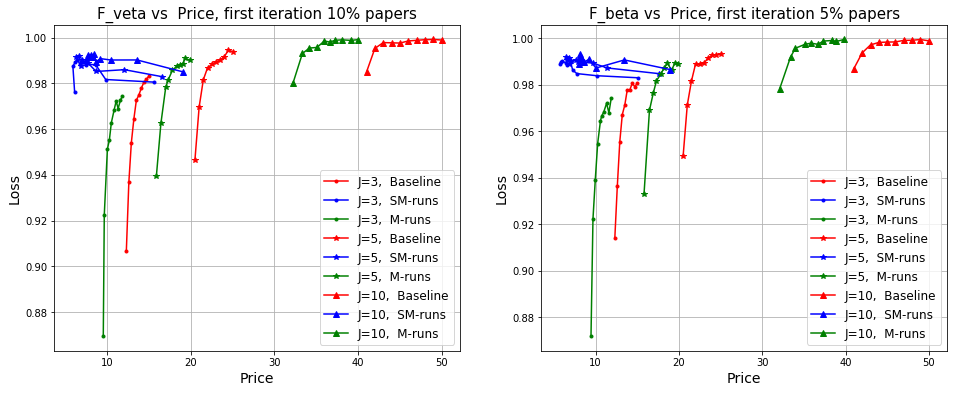

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(['red', 'blue', 'green'])
J = [3, 5, 10]
algs_arr = ['Baseline', 'SM-runs', 'M-runs']

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['f_beta'].values
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)
        
plot_alg(data, 3, '.', 0)
plot_alg(data, 5, '*', 0)
plot_alg(data, 10, '^', 0)
ax[0].set_title('F_veta vs  Price, first iteration 10% papers', size=15)
ax[0].set_xlabel('Price', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()


ax[1].set_color_cycle(['red', 'blue', 'green'])
plot_alg(data2, 3, '.', 1)
plot_alg(data2, 5, '*', 1)
plot_alg(data2, 10, '^', 1)
ax[1].set_title('F_beta vs  Price, first iteration 5% papers', size=15)
ax[1].set_xlabel('Price', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()

# Loss vs Price investigation for SM-runs

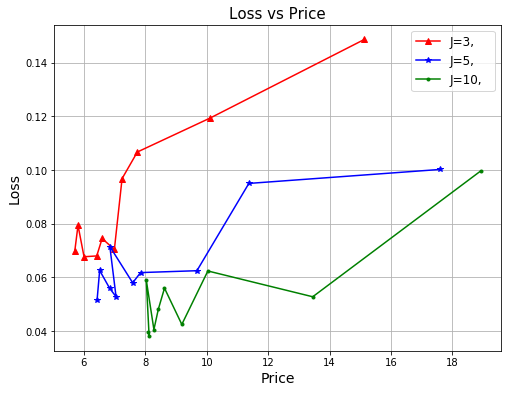

In [26]:
data = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')
data = data.loc[(data['alg'] == 'SM-runs')]

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['red', 'blue', 'green'])

def plot_alg(J, marker):
    y = data.loc[(data['J'] == J)]['loss_mean'].values
    x = data.loc[(data['J'] == J)]['price_mean'].values
    err = data.loc[(data['J'] == J)]['loss_std'].values
    plt.plot(x, y, label='J={},  '.format(J), marker=marker)
#     plt.errorbar(x, y, yerr=err, marker=marker)

plot_alg(3, '^')
plot_alg(5, '*')
plot_alg(10, '.')

plt.title('Loss vs Price', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

# The impact of accuracy errors

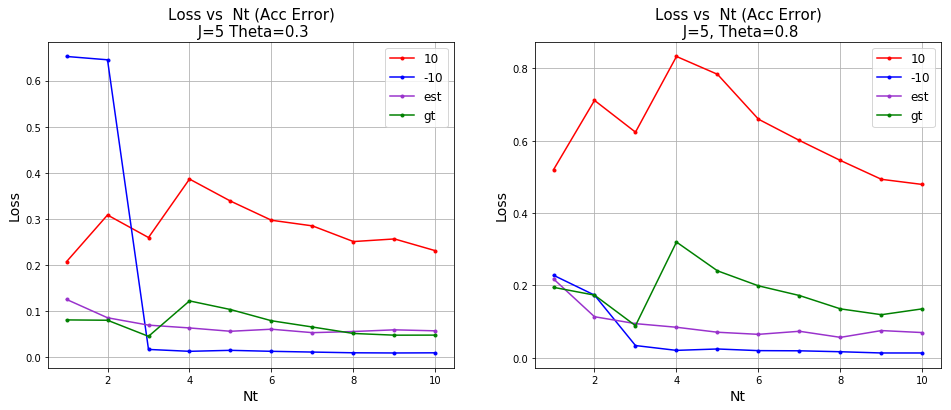

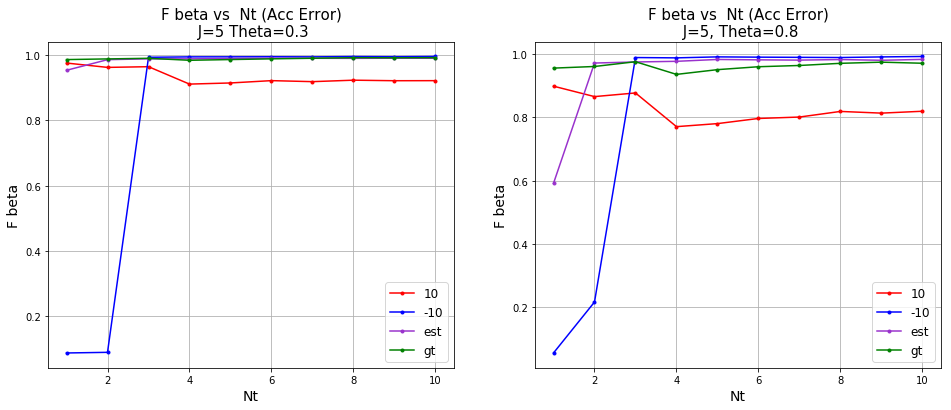

In [65]:
data = pd.read_csv('../output/data/accurcy_criteria_experiment.csv')
data = data.loc[(data['J'] == 5)]
colors = ['red', 'blue', 'darkorchid', 'green']
acc_terms = ['10', '-10', 'est', 'gt']
x = range(1, 11)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
# ax[0].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# ax[1].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# acc_terms = ['0.05', '-0.05', '0.1', '-0.1', 'None']
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)

def plot_alg(data, marker, i, theta):
    for acc_term in acc_terms:
        y = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['loss_mean'].values
#         print acc_term, theta
#         print y
        err = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=acc_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('Loss vs  Nt (Acc Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('Loss vs  Nt (Acc Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()



# -------------------------------
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
# ax[0].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# ax[1].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# acc_terms = ['0.05', '-0.05', '0.1', '-0.1', 'None']
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)

def plot_alg(data, marker, i, theta):
    for acc_term in acc_terms:
        y = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['f_beta'].values
#         print acc_term, theta
#         print y
#         err = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=acc_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('F beta vs  Nt (Acc Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('F beta', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('F beta vs  Nt (Acc Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('F beta', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()

# The impact of power errors

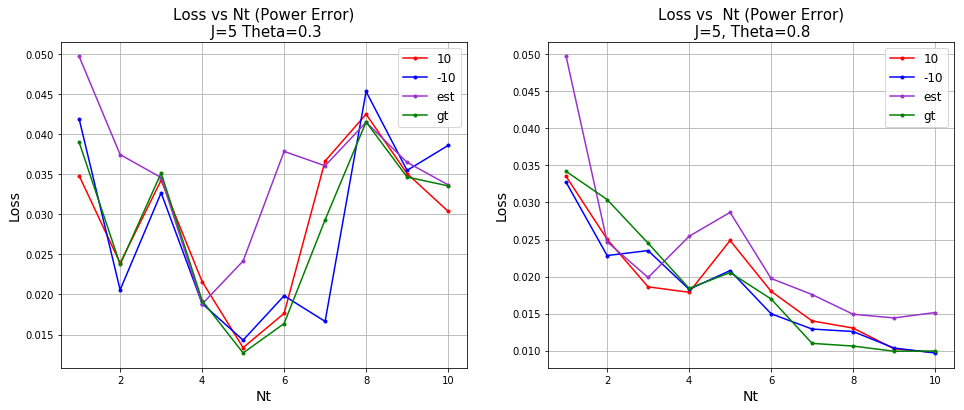

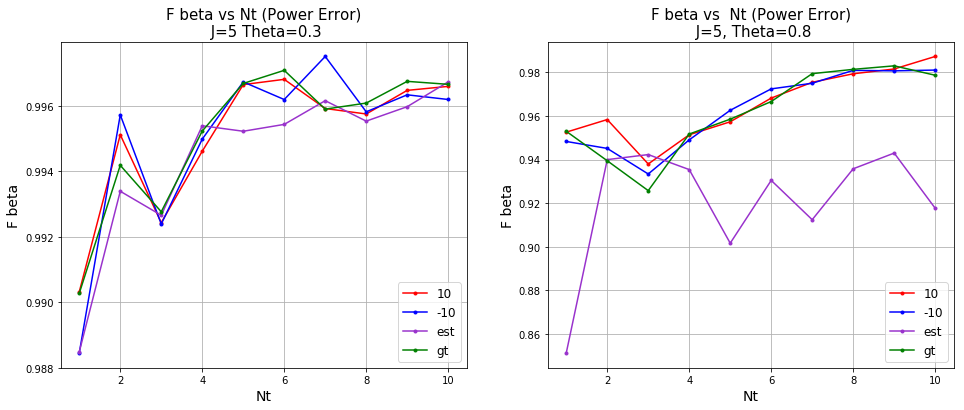

In [66]:
data = pd.read_csv('../output/data/power_criteria_experiment.csv')
data = data.loc[(data['J'] == 5)]
colors = ['red', 'blue', 'darkorchid', 'green']
pow_terms = ['10', '-10', 'est', 'gt']
x = range(1, 11)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)
# x = [1, 2, 3, 4, 5]

def plot_alg(data, marker, i, theta):
    for pow_term in pow_terms:
        y = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['loss_mean'].values
#         err = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=pow_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('Loss vs Nt (Power Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('Loss vs  Nt (Power Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()


# ------------------------
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)
# x = [1, 2, 3, 4, 5]

def plot_alg(data, marker, i, theta):
    for pow_term in pow_terms:
        y = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['f_beta'].values
#         err = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=pow_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('F beta vs Nt (Power Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('F beta', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('F beta vs  Nt (Power Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('F beta', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()